In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Loading the Dataset 1 (SST2 Dataset)
train_data = pd.read_csv(
    "https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv",
    sep="\t", names=["text", "label"]
)

test_data = pd.read_csv(
    "https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv",
    sep="\t", names=["text", "label"]
)

x_train = train_data['text']
y_train = train_data['label']

x_test = test_data['text']
y_test = test_data['label']

# Splitting the training dataset into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train = x_train.to_frame().reset_index(drop=True)
x_val = x_val.to_frame().reset_index(drop=True)
x_test = x_test.to_frame().reset_index(drop=True)
y_train = y_train.to_frame().reset_index(drop=True)
y_val = y_val.to_frame().reset_index(drop=True)
y_test = y_test.to_frame().reset_index(drop=True)

x_train = x_train['text']
x_val = x_val['text']
x_test = x_test['text']
y_train = y_train['label']
y_val = y_val['label']
y_test = y_test['label']

In [3]:
x_train

,text
0,graphic sex may be what 's attracting audience...
1,perhaps the grossest movie ever made
2,"the film is moody , oozing , chilling and hear..."
3,watching the chemistry between freeman and jud...
4,the wonderfully lush morvern callar is pure pu...
...,...
5531,a summer entertainment adults can see without ...
5532,it 's a cool event for the whole family
5533,one of the worst films of 2002
5534,the trashy teen sleaze equivalent of showgirls


In [4]:
y_train

,label
0,1
1,0
2,1
3,1
4,1
...,...
5531,1
5532,1
5533,0
5534,0


In [5]:
x_val

,text
0,overly melodramatic
1,lrb westbrook rrb makes a wonderful subject fo...
2,mama africa pretty much delivers on that promise
3,"sad nonsense , this"
4,easily the most thoughtful fictional examinati...
...,...
1379,diane lane 's sophisticated performance ca n't...
1380,the mantra behind the project seems to have be...
1381,"what a concept , what an idea , what a thrill ..."
1382,lrb seems rrb even more uselessly redundant an...


In [6]:
y_val

,label
0,0
1,1
2,1
3,0
4,1
...,...
1379,0
1380,0
1381,1
1382,0


In [7]:
x_test

,text
0,"no movement , no yuks , not much of anything"
1,"a gob of drivel so sickly sweet , even the eag..."
2,"gangs of new york is an unapologetic mess , wh..."
3,"we never really feel involved with the story ,..."
4,this is one of polanski 's best films
...,...
1816,"an often deadly boring , strange reading of a ..."
1817,the problem with concept films is that if the ...
1818,"safe conduct , however ambitious and well inte..."
1819,"a film made with as little wit , interest , an..."


In [8]:
y_test

,label
0,0
1,0
2,0
3,0
4,1
...,...
1816,0
1817,0
1818,0
1819,0


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Defining the MLP Model for Bag-of-wors(bow) with the given parameters
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(10000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

In [10]:
# Function to count the trainable parameters per layer
def count_parameters_per_layer(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Layer: {name} | Parameters: {param.numel()}")
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\nTotal Trainable Parameters: {total_params}")

In [11]:
# Initializing the model
model = MLP()
count_parameters_per_layer(model)

Layer: fc1.weight | Parameters: 5120000
Layer: fc1.bias | Parameters: 512
Layer: fc2.weight | Parameters: 131072
Layer: fc2.bias | Parameters: 256
Layer: fc3.weight | Parameters: 32768
Layer: fc3.bias | Parameters: 128
Layer: fc4.weight | Parameters: 8192
Layer: fc4.bias | Parameters: 64
Layer: fc5.weight | Parameters: 128
Layer: fc5.bias | Parameters: 2

Total Trainable Parameters: 5293122


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Handling missing values (Replacing NaN with an empty string)
x_train = x_train.fillna("")
x_val = x_val.fillna("")
x_test = x_test.fillna("")

# Initializig CountVectorizer with max_features=10,000
vectorizer = CountVectorizer(max_features=10000)

x_train = vectorizer.fit_transform(x_train).toarray()
x_val = vectorizer.transform(x_val).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [13]:
# Printing shape of transformed data
print(f"Train BoW Shape: {x_train.shape}")
print(f"Validation BoW Shape: {x_val.shape}")
print(f"Test BoW Shape: {x_test.shape}")

Train BoW Shape: (5536, 10000)
Validation BoW Shape: (1384, 10000)
Test BoW Shape: (1821, 10000)


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [15]:
# Converting NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)


# Creating DataLoader for batch processing
batch_size = 32
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [27]:
# Hyperparameters, device, and model initialization
epochs = 10
learning_rate = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MLP()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_val_acc = 0.0
train_acc_arr = []
val_acc_arr = []
train_loss_arr = []
val_loss_arr = []
# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    total_correct, total_samples = 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        train_loss += loss.item()

    train_acc = total_correct / total_samples
    train_acc_arr.append(train_acc)
    train_loss_arr.append(train_loss)

 # Validation phase (without gradient computation)
    model.eval()
    val_loss = 0
    val_correct, val_samples = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_samples += labels.size(0)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_acc = val_correct / val_samples
    val_acc_arr.append(val_acc)
    val_loss_arr.append(val_loss)
    print(f"Epoch [{epoch+1}/{epochs}]: Train Acc = {train_acc:.2f}, Val Acc = {val_acc:.2f}")

   # Saving the best model based on validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "checkpoint.pt")
        print(f"New best model saved with Validation Accuracy: {best_val_acc:.2f}")

Epoch [1/10]: Train Acc = 0.52, Val Acc = 0.52
New best model saved with Validation Accuracy: 0.52
Epoch [2/10]: Train Acc = 0.71, Val Acc = 0.77
New best model saved with Validation Accuracy: 0.77
Epoch [3/10]: Train Acc = 0.88, Val Acc = 0.81
New best model saved with Validation Accuracy: 0.81
Epoch [4/10]: Train Acc = 0.96, Val Acc = 0.80
Epoch [5/10]: Train Acc = 0.98, Val Acc = 0.78
Epoch [6/10]: Train Acc = 0.99, Val Acc = 0.80
Epoch [7/10]: Train Acc = 1.00, Val Acc = 0.79
Epoch [8/10]: Train Acc = 1.00, Val Acc = 0.79
Epoch [9/10]: Train Acc = 1.00, Val Acc = 0.80
Epoch [10/10]: Train Acc = 1.00, Val Acc = 0.79


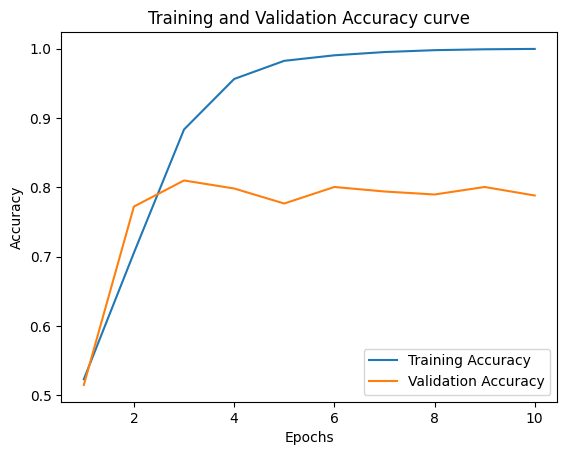

In [28]:
import matplotlib.pyplot as plt

# Plotting the graph between training accuracy and validation accuracy for each epoch
plt.plot(range(1, epochs+1), train_acc_arr, label="Training Accuracy")
plt.plot(range(1, epochs+1), val_acc_arr, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy curve")
plt.legend()
plt.show()

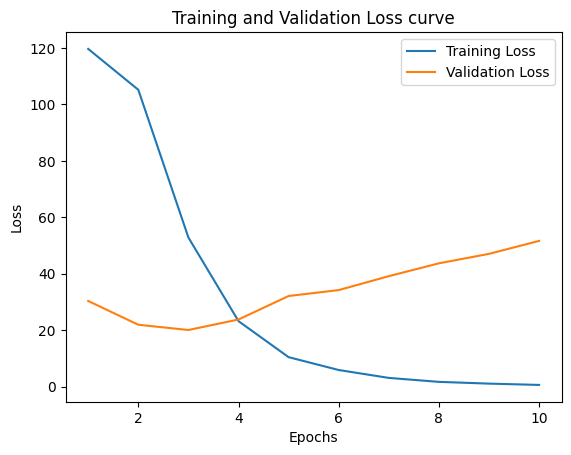

In [29]:
import matplotlib.pyplot as plt

# Plotting the graph between training loss and validation loss for each epoch
plt.plot(range(1, epochs+1), train_loss_arr, label="Training Loss")
plt.plot(range(1, epochs+1), val_loss_arr, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss curve")
plt.legend()
plt.show()

In [30]:
dynamic_quantized_model = torch.quantization.quantize_dynamic(
    model,  # The model to quantize
    {torch.nn.Linear},  # Specify which modules to quantize (Linear layers in BERT)
    dtype=torch.qint8  # Quantization data type
)

torch.save(dynamic_quantized_model.state_dict(), "quantized_model.pt")

In [31]:
half_model = model.half()

torch.save(half_model.state_dict(), "half_model.pt")

In [32]:
from sklearn.metrics import accuracy_score
def model_accuracy(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:

            params = list(model.parameters())
            if params and params[0].dtype == torch.float16:
                inputs = inputs.half()

            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return accuracy_score(all_labels, all_preds)*100

In [33]:
import os
def model_storage(model_path):
    return os.path.getsize(model_path) / (1024 * 1024)

In [34]:
import time
def model_inference_time(model, test_loader):
    model.eval()
    start_time  = time.time()
    with torch.no_grad():
        for inputs, labels in test_loader:

            params = list(model.parameters())
            if params and params[0].dtype == torch.float16:
                inputs = inputs.half()

            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
    end_time  = time.time()
    inference_time = end_time - start_time
    return inference_time*1000

In [35]:
model = MLP()
model.load_state_dict(torch.load("checkpoint.pt"))

<All keys matched successfully>

In [36]:
original_acc = model_accuracy(model, test_loader)
dynamic_acc = model_accuracy(dynamic_quantized_model, test_loader)
half_acc = model_accuracy(half_model, test_loader)

original_storage = model_storage("/content/checkpoint.pt")
dynamic_storage = model_storage("/content/quantized_model.pt")
half_storage = model_storage("/content/half_model.pt")

original_inference_time = model_inference_time(model, test_loader)
dynamic_inference_time = model_inference_time(dynamic_quantized_model, test_loader)
half_inference_time = model_inference_time(half_model, test_loader)

In [37]:
# Create summary table
print("-------------------------------------------------------------------------------------------")
print("Model                   | Accuracy (Out of 100) | Storage (In MB) | Inference time (In ms)|")
print(f"Original                | {original_acc:.2f}                 | {original_storage:.2f}           | {original_inference_time:.2f}                |")
print(f"Dynamic Quantized       | {dynamic_acc:.2f}                 | {dynamic_storage:.2f}            | {dynamic_inference_time:.2f}                |")
print(f"Half Precision (FP16)   | {half_acc:.2f}                 | {half_storage:.2f}           | {half_inference_time:.2f}               |")
print("-------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------
Model                   | Accuracy (Out of 100) | Storage (In MB) | Inference time (In ms)|
Original                | 80.45                 | 20.20           | 645.22                |
Dynamic Quantized       | 79.57                 | 5.06            | 324.59                |
Half Precision (FP16)   | 79.41                 | 10.10           | 1860.59               |
-------------------------------------------------------------------------------------------
